## **Scripts modelos base tabajo final Parkinson dataset**

In [ ]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

link = 'https://drive.google.com/file/d/1Ljk8zoMN_qvWfnK1v7qCPqoDoRmiacaf/view?usp=sharing'
link2 = 'https://drive.google.com/file/d/1hYwXfVf15FAIBLEbaeWaKP6H60rBRnoB/view?usp=sharing'
  
import pandas as pd
import numpy as np 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn import metrics
from scipy.spatial import distance
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt 

import joblib

import seaborn as sns
  
# to get the id part of the file
id = link.split("/")[-2]
id2 = link2.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_data.txt')  
  
dataset = pd.read_csv('train_data.txt', names=["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks", "UPDRS", "class information"])

downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('test_data.txt') 
dataset2 = pd.read_csv('test_data.txt', names=["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks", "class information"])


X = dataset.drop(["class information", "UPDRS"], axis=1)
Y = dataset.drop(["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks", "UPDRS"], axis=1)

X_to_test = dataset2.drop(["class information"], axis=1)
Y_to_test = dataset2.drop(["id", "Jitter (local)", "Jitter (local, absolute)", 
                                               "Jitter (rap)", "Jitter (ppq5)", "Jitter (ddp)", 
                                               "Shimmer (local)", "Shimmer (local, dB)", "Shimmer (apq3)",
                                               "Shimmer (apq5)", "Shimmer (apq11)", "Shimmer (dda)",
                                               "AC", "NTH", "HTN", "Median pitch", "Mean pitch",
                                               "Standard deviation", "Minimum pitch", "Maximum pitch",
                                               "Number of pulses", "Number of periods", "Mean period",
                                               "Standard deviation of period", "Fraction of locally unvoiced frames",
                                               "Number of voice breaks", "Degree of voice breaks"], axis=1)
X.head(20)





,id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.911508,0.109983,12.212,158.689,164.768,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318
5,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,15.787,0.897708,0.152955,11.987,195.952,195.222,4.692,186.593,202.812,74,73,0.005118,0.000187,23.214,0,0.000
6,1,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,7.670,11.381,0.935717,0.078695,13.705,195.535,192.316,7.512,177.299,200.638,85,84,0.005199,0.000245,4.348,0,0.000
7,1,1.920,0.000099,0.926,1.031,2.777,10.184,1.108,3.650,4.611,7.127,10.951,0.898598,0.147518,12.400,196.745,194.284,5.979,181.465,201.921,71,70,0.005137,0.000215,33.929,0,0.000
8,1,2.257,0.000119,1.239,1.530,3.716,8.044,0.877,3.449,4.239,7.654,10.346,0.877616,0.217236,12.831,191.345,185.423,21.878,86.139,210.523,107,104,0.005282,0.000348,15.152,2,9.810
9,1,1.594,0.000085,0.850,0.951,2.550,7.200,0.823,2.480,3.826,9.228,7.440,0.917596,0.112336,14.039,190.838,187.775,10.087,166.895,203.133,113,112,0.005335,0.000332,0.000,0,0.000


In [ ]:
X_to_test.head(20)


,id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576000,3.223,0.996050,0.003967,24.204,186.266,186.300,0.859,184.502,187.880,183.0,182.0,0.005368,0.000025,0.000,0.0,0.000
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894000,1.835,0.998471,0.001531,28.729,200.577,200.477,0.755,198.665,202.214,194.0,193.0,0.004988,0.000020,0.000,0.0,0.000
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017000,1.891,0.998021,0.001984,27.349,202.868,202.425,1.860,197.220,206.060,198.0,197.0,0.004940,0.000046,0.000,0.0,0.000
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823000,1.667,0.999154,0.000847,32.114,204.027,204.090,0.931,202.324,206.182,200.0,199.0,0.004900,0.000023,0.000,0.0,0.000
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777000,1.599,0.999295,0.000706,32.816,207.519,207.468,0.880,205.407,209.927,204.0,203.0,0.004820,0.000022,0.000,0.0,0.000
5,1,0.208,0.000009,0.077,0.095,0.230,1.241,0.109,0.487,0.715,1.568000,1.461,0.998378,0.001631,30.960,224.812,226.435,6.224,218.455,243.523,221.0,220.0,0.004416,0.000120,0.000,0.0,0.000
6,2,1.137,0.000102,0.643,0.506,1.929,6.993,0.620,3.394,4.156,6.189000,10.183,0.933691,0.078360,13.196,111.318,111.054,4.301,97.914,119.037,110.0,109.0,0.009014,0.000370,0.000,0.0,0.000
7,2,0.606,0.000065,0.162,0.269,0.486,5.351,0.481,2.444,3.295,4.568000,7.333,0.962727,0.040464,15.913,93.483,92.935,3.659,80.332,98.876,92.0,91.0,0.010768,0.000451,0.000,0.0,0.000
8,2,0.765,0.000081,0.204,0.311,0.611,5.314,0.461,2.492,3.469,5.992000,7.477,0.940527,0.065536,12.954,93.239,93.811,3.686,88.629,104.526,93.0,92.0,0.010657,0.000411,0.000,0.0,0.000
9,2,0.374,0.000038,0.159,0.215,0.477,5.634,0.499,2.627,3.240,6.694000,7.882,0.982695,0.017775,19.361,97.264,97.274,0.960,95.165,99.424,96.0,95.0,0.010280,0.000104,0.000,0.0,0.000


In [ ]:
for i in X.columns:
    X[i] = X[i].astype(float)
X.head(20)

,id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),Shimmer (dda),AC,NTH,HTN,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,1.0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160.0,159.0,0.006065,0.000416,0.000,0.0,0.000
1,1.0,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170.0,169.0,0.005181,0.000403,2.247,0.0,0.000
2,1.0,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.911508,0.109983,12.212,158.689,164.768,12.981,146.445,211.442,1431.0,1427.0,0.006071,0.000474,10.656,1.0,0.178
3,1.0,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94.0,92.0,0.004910,0.000320,0.000,0.0,0.000
4,1.0,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117.0,114.0,0.004757,0.000380,18.182,1.0,13.318
5,1.0,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,15.787,0.897708,0.152955,11.987,195.952,195.222,4.692,186.593,202.812,74.0,73.0,0.005118,0.000187,23.214,0.0,0.000
6,1.0,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,7.670,11.381,0.935717,0.078695,13.705,195.535,192.316,7.512,177.299,200.638,85.0,84.0,0.005199,0.000245,4.348,0.0,0.000
7,1.0,1.920,0.000099,0.926,1.031,2.777,10.184,1.108,3.650,4.611,7.127,10.951,0.898598,0.147518,12.400,196.745,194.284,5.979,181.465,201.921,71.0,70.0,0.005137,0.000215,33.929,0.0,0.000
8,1.0,2.257,0.000119,1.239,1.530,3.716,8.044,0.877,3.449,4.239,7.654,10.346,0.877616,0.217236,12.831,191.345,185.423,21.878,86.139,210.523,107.0,104.0,0.005282,0.000348,15.152,2.0,9.810
9,1.0,1.594,0.000085,0.850,0.951,2.550,7.200,0.823,2.480,3.826,9.228,7.440,0.917596,0.112336,14.039,190.838,187.775,10.087,166.895,203.133,113.0,112.0,0.005335,0.000332,0.000,0.0,0.000


In [ ]:
for i in X_to_test.columns:
    X_to_test[i] = X_to_test[i].astype(float)

In [ ]:
Y['class information'] = Y['class information'].astype(int)

In [ ]:
Y_to_test['class information'] = Y_to_test['class information'].astype(int)

In [ ]:

print(X.shape)
print(Y.shape)
print(X_to_test.shape)
print(Y_to_test.shape)


def trainModel(model, params, Xi, Yi):
    Pacientes = Xi['id'].values
    Xv = Xi.values
    y = Yi['class information'].values
    
    train_inds, test_inds = next(GroupKFold(n_splits = 10).split(Xv, y, Pacientes))
    sc_X = StandardScaler()   
    X_train = sc_X.fit_transform(Xv[train_inds,:])
    X_test = sc_X.transform(Xv[test_inds,:])
    y_test = y[test_inds]
    y_train = y[train_inds]
    
    
    gkf = GroupKFold(n_splits = 5).split(X_train, y_train, Pacientes[train_inds])
    trainResult = GridSearchCV(
        model,
         cv=gkf,
          param_grid=params,
           return_train_score=True,
           n_jobs=-1)
    
    class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
    trainResult.fit(X_train, y_train)
    print("Mejores Parametros:",trainResult.best_params_)
    return trainResult, X_test, y_test

(1040, 27)
(1040, 1)
(168, 27)
(168, 1)


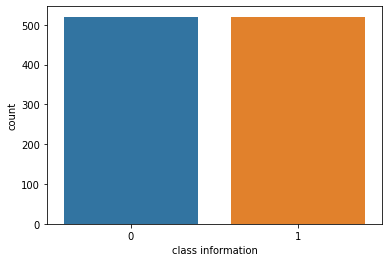

In [ ]:
sns.countplot(x=Y['class information'],data=Y)


In [ ]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [ ]:

modelQda = QuadraticDiscriminantAnalysis()
paramsQda = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }


modelQda,X_test,y_test = trainModel(modelQda, paramsQda, X, Y)



Mejores Parametros: {'reg_param': 0.1, 'store_covariance': True, 'tol': 0.0001}


In [20]:
predictQDA = modelQda.predict(X_test)
accuracyQDA = metrics.accuracy_score(y_test, predictQDA)
precisionQDA = metrics.precision_score(y_test, predictQDA)
recallQDA = metrics. recall_score(y_test, predictQDA)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Analisis discriminante quadratico': [accuracyQDA, precisionQDA, recallQDA]
    })
table


,Metric,Analisis discriminante quadratico
0,Accuracy,0.875
1,Precision,1.000
2,Recall,0.750


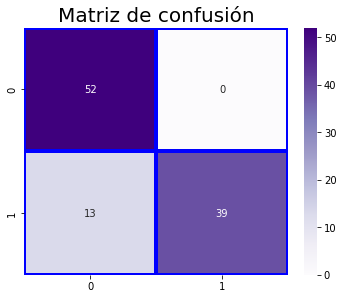

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(y_test, predictQDA),annot=True,fmt="d",linecolor="blue",linewidths=3,cmap='Purples')
plt.title("Matriz de confusión",fontsize=20)
matriss = metrics.confusion_matrix(y_test,predictQDA,normalize='true')

In [ ]:
X_all = X.values
y_all = Y['class information'].values
QDA_all = QuadraticDiscriminantAnalysis(reg_param=0.1, store_covariance=True, tol=0.0001)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
QDA_all.fit(X_all, y_all)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1, store_covariance=True,
                              tol=0.0001)

In [ ]:
predictQDA2 = QDA_all.predict(X_to_test)
accuracyQDA2 = metrics.accuracy_score(Y_to_test, predictQDA2)
precisionQDA2 = metrics.precision_score(Y_to_test, predictQDA2)
recallQDA2 = metrics. recall_score(Y_to_test, predictQDA2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Analisis discriminante quadratico': [accuracyQDA2, precisionQDA2, recallQDA2]
    })
table

,Metric,Analisis discriminante quadratico
0,Accuracy,0.767857
1,Precision,1.000000
2,Recall,0.767857


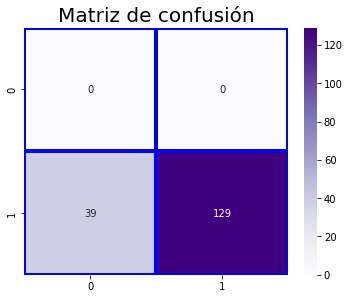

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_to_test, predictQDA2),annot=True,fmt="d",linecolor="blue",linewidths=3,cmap='Purples')
plt.title("Matriz de confusión",fontsize=20)
matriss = metrics.confusion_matrix(Y_to_test,predictQDA2,normalize='true')

**Gradient boosting**

In [22]:
GBTModel = GradientBoostingClassifier()
params = {'n_estimators':[10,20,50,100],
          'loss': ['exponential', 'deviance']}
GBTModel,X_test,y_test = trainModel(GBTModel,params,X,Y)

Mejores Parametros: {'loss': 'exponential', 'n_estimators': 10}


In [23]:
predictGBT = GBTModel.predict(X_test)
accuracyGBT = metrics.accuracy_score(y_test, predictGBT)
precisionGBT = metrics.precision_score(y_test, predictGBT)
recallGBT = metrics. recall_score(y_test, predictGBT)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Gradient boosting tree': [accuracyGBT, precisionGBT, recallGBT]
    })
table


,Metric,Gradient boosting tree
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0


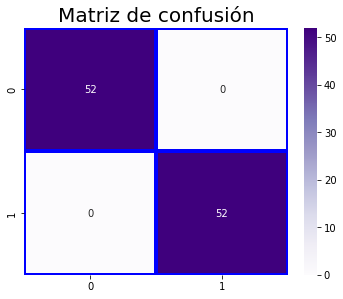

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(y_test, predictGBT),annot=True,fmt="d",linecolor="blue",linewidths=3,cmap='Purples')
plt.title("Matriz de confusión",fontsize=20)
matriss = metrics.confusion_matrix(y_test,predictGBT,normalize='true')

In [24]:
X_all = X.values
y_all = Y['class information'].values
GBT_all = GradientBoostingClassifier(loss='exponential', n_estimators=10)
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
GBT_all.fit(X_all, y_all)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
predictGBT2 = GBT_all.predict(X_to_test)
accuracyGBT2 = metrics.accuracy_score(Y_to_test, predictGBT2)
precisionGBT2 = metrics.precision_score(Y_to_test, predictGBT2)
recallGBT2 = metrics. recall_score(Y_to_test, predictGBT2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Gradient boosting tree': [accuracyGBT2, precisionGBT2, recallGBT2]
    })
table

,Metric,Gradient boosting tree
0,Accuracy,0.714286
1,Precision,1.000000
2,Recall,0.714286


# **Redes neuronales**

In [ ]:
neuralNetwork = MLPClassifier()
params = {
    'solver': ['adam', 'lbgfs'],
    'max_iter': [200, 300, 400],    
    'hidden_layer_sizes':[(50, 50, 50), (100,100,100), (150,150,150)],
    'alpha': 10.0** -np.arange(1, 4),
    'activation': ["relu", "tanh","logistic"],
    'random_state': [1, None]
}
artificialNN, X_test, y_test = trainModel(neuralNetwork,params,X,Y)

In [26]:
predictNN = artificialNN.predict(X_test)
accuracyNN = metrics.accuracy_score( y_test, predictNN)
precisionNN = metrics.precision_score( y_test, predictNN)
recallNN = metrics. recall_score( y_test, predictNN)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Redes Neuronales Artificiales ': [accuracyNN, precisionNN, recallNN]
    })
table


NameError: ignored

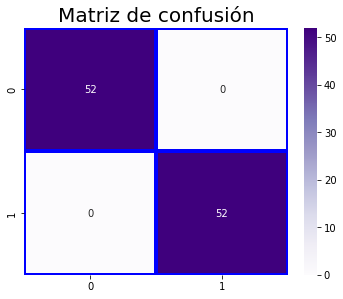

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(y_test, predictNN),annot=True,fmt="d",linecolor="blue",linewidths=3,cmap='Purples')
plt.title("Matriz de confusión",fontsize=20)
matriss = metrics.confusion_matrix(y_test,predictNN,normalize='true')

In [ ]:
X_all = X.values
y_all = Y['class information'].values
RNA_all = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(150, 150, 150),max_iter=300, random_state=None, solver='adam')
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
RNA_all.fit(X_all, y_all)

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictNN2 = RNA_all.predict(X_to_test)
accuracyNN2 = metrics.accuracy_score(Y_to_test, predictNN2)
precisionNN2 = metrics.precision_score(Y_to_test, predictNN2)
recallNN2 = metrics. recall_score(Y_to_test,predictNN2)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Redes Neuronales Artificiales ': [accuracyNN2, precisionNN2, recallNN2]
    })
table


,Metric,Redes Neuronales Artificiales
0,Accuracy,0.541667
1,Precision,1.000000
2,Recall,0.541667


# **SVM**

In [ ]:
SVM = SVC()
gammas = [0.001, 0.01, 0.1, 1]
params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma' : [0.001, 0.01, 0.1, 1],
          'kernel': ['rbf','linear', 'poly', 'sigmoid']}
modelSVM, X_test, Y_test = trainModel(SVM,params,X,Y)

Mejores Parametros: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}


In [ ]:
predictSVM = modelSVM.predict(X_test)
accuracySVM = metrics.accuracy_score(y_test, predictSVM)
precisionSVM = metrics.precision_score(y_test, predictSVM)
recallSVM = metrics. recall_score(y_test, predictSVM)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'SVM': [accuracySVM, precisionSVM, recallSVM]
    })
table
print("\nEficiencia en validación SVM: " + str((1-(classification_error(y_test, predictSVM)))*100) + "%" )


Eficiencia en validación SVM: 100.0%


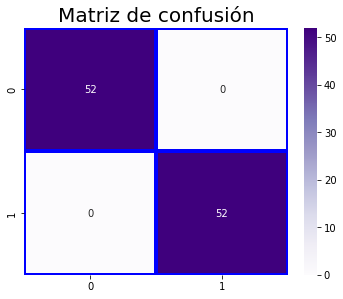

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(y_test, predictSVM),annot=True,fmt="d",linecolor="blue",linewidths=3,cmap='Purples')
plt.title("Matriz de confusión",fontsize=20)
matriss = metrics.confusion_matrix(y_test,predictSVM,normalize='true')

In [ ]:
X_all = X.values
y_all = Y['class information'].values
SVM_all = SVC(C=10,gamma=0.001, kernel='linear')
class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(y_all),y_all)
SVM_all.fit(X_all, y_all)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictSVM2 = SVM_all.predict(X_to_test)
accuracySVM2 = metrics.accuracy_score(predictSVM2, Y_to_test)
precisionSVM2 = metrics.precision_score(predictSVM2, Y_to_test)
recallSVM2 = metrics. recall_score(predictSVM2, Y_to_test)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'SVM': [accuracySVM2, precisionSVM2, recallSVM2]
    })
table


,Metric,SVM
0,Accuracy,0.607143
1,Precision,0.607143
2,Recall,1.000000


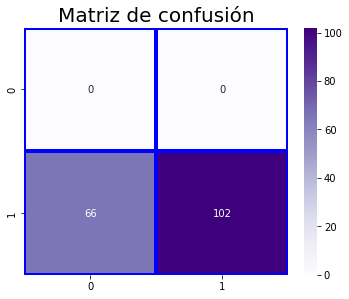

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_to_test, predictSVM2),annot=True,fmt="d",linecolor="blue",linewidths=3,cmap='Purples')
plt.title("Matriz de confusión",fontsize=20)
matriss = metrics.confusion_matrix(Y_to_test,predictSVM2,normalize='true')